## Picture making

What does the partial charge look like for the compounds?

In [1]:
!ls *sdf

NS3hairpin-RB0.sdf           XX01ZVNS2B.filtered.sdf
RB1.sdf                      crystalcrackers.sdf
S2-ROCS.sdf                  new_hits.sdf
S2-rocs-0RB.sdf              new_other_hits.sdf
S2-rocs-1RB.sdf              new_other_hits_fragments.sdf
XX01ZVNS2B.corrected.sdf     stolen.sdf


In [2]:
from rdkit import Chem

with Chem.SDMolSupplier('XX01ZVNS2B.corrected.sdf') as sdfh:
    hitdex = {hit.GetProp('_Name'): hit for hit in sdfh}

In [34]:
Chem.MolToXYZFile(hitdex['x1098_0B'], 'x1098.xyz')

In [8]:
Chem.MolToSmiles( hitdex['x1098_0B'] )

'Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1'

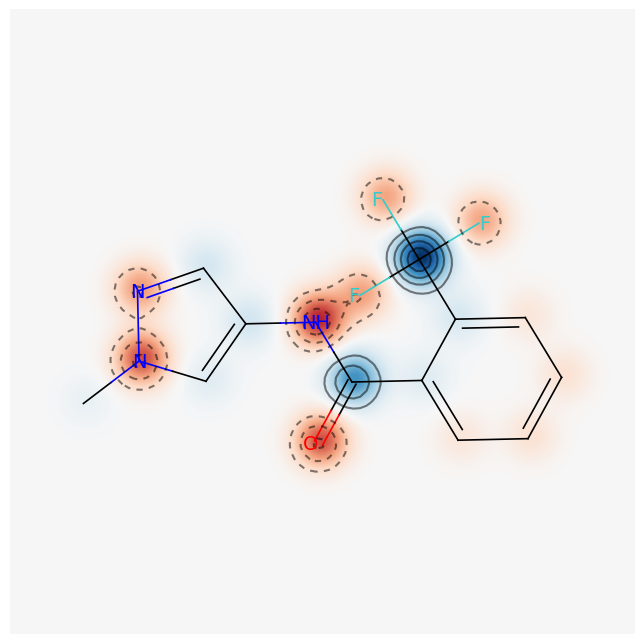

In [37]:
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
flatto = Chem.Mol(mol)
AllChem.Compute2DCoords(flatto)
fig = SimilarityMaps.GetSimilarityMapFromWeights(flatto, contribs, colorMap='RdBu', contourLines=10)

In [40]:
import pandas as pd


libraries = pd.read_csv('https://github.com/matteoferla/Fragment-hit-follow-up-chemistry/raw/main/combined-XChem-libraries.csv')

In [42]:
from rdkit import Chem

libraries['mol'] = libraries.SMILES.apply(Chem.MolFromSmiles)

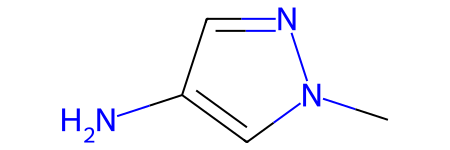

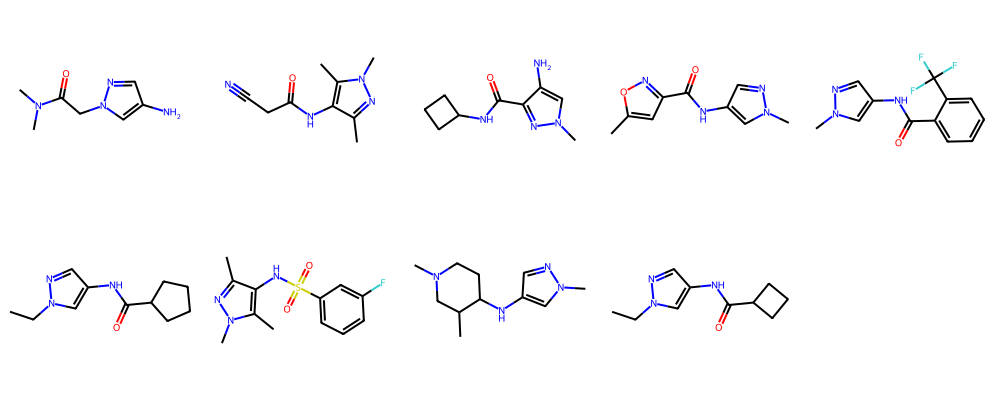

In [50]:
from rdkit.Chem import Draw
aminomeythylpyrazole = Chem.MolFromSmiles('n1(C)ncc(N)c1')
l = libraries.loc[libraries.mol.apply(lambda mol: mol.HasSubstructMatch(aminomeythylpyrazole)) & (libraries.library == 'DSiPoised')]

Draw.MolsToGridImage(l.mol, molsPerRow=5)

/Users/user/.conda/envs/py310/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


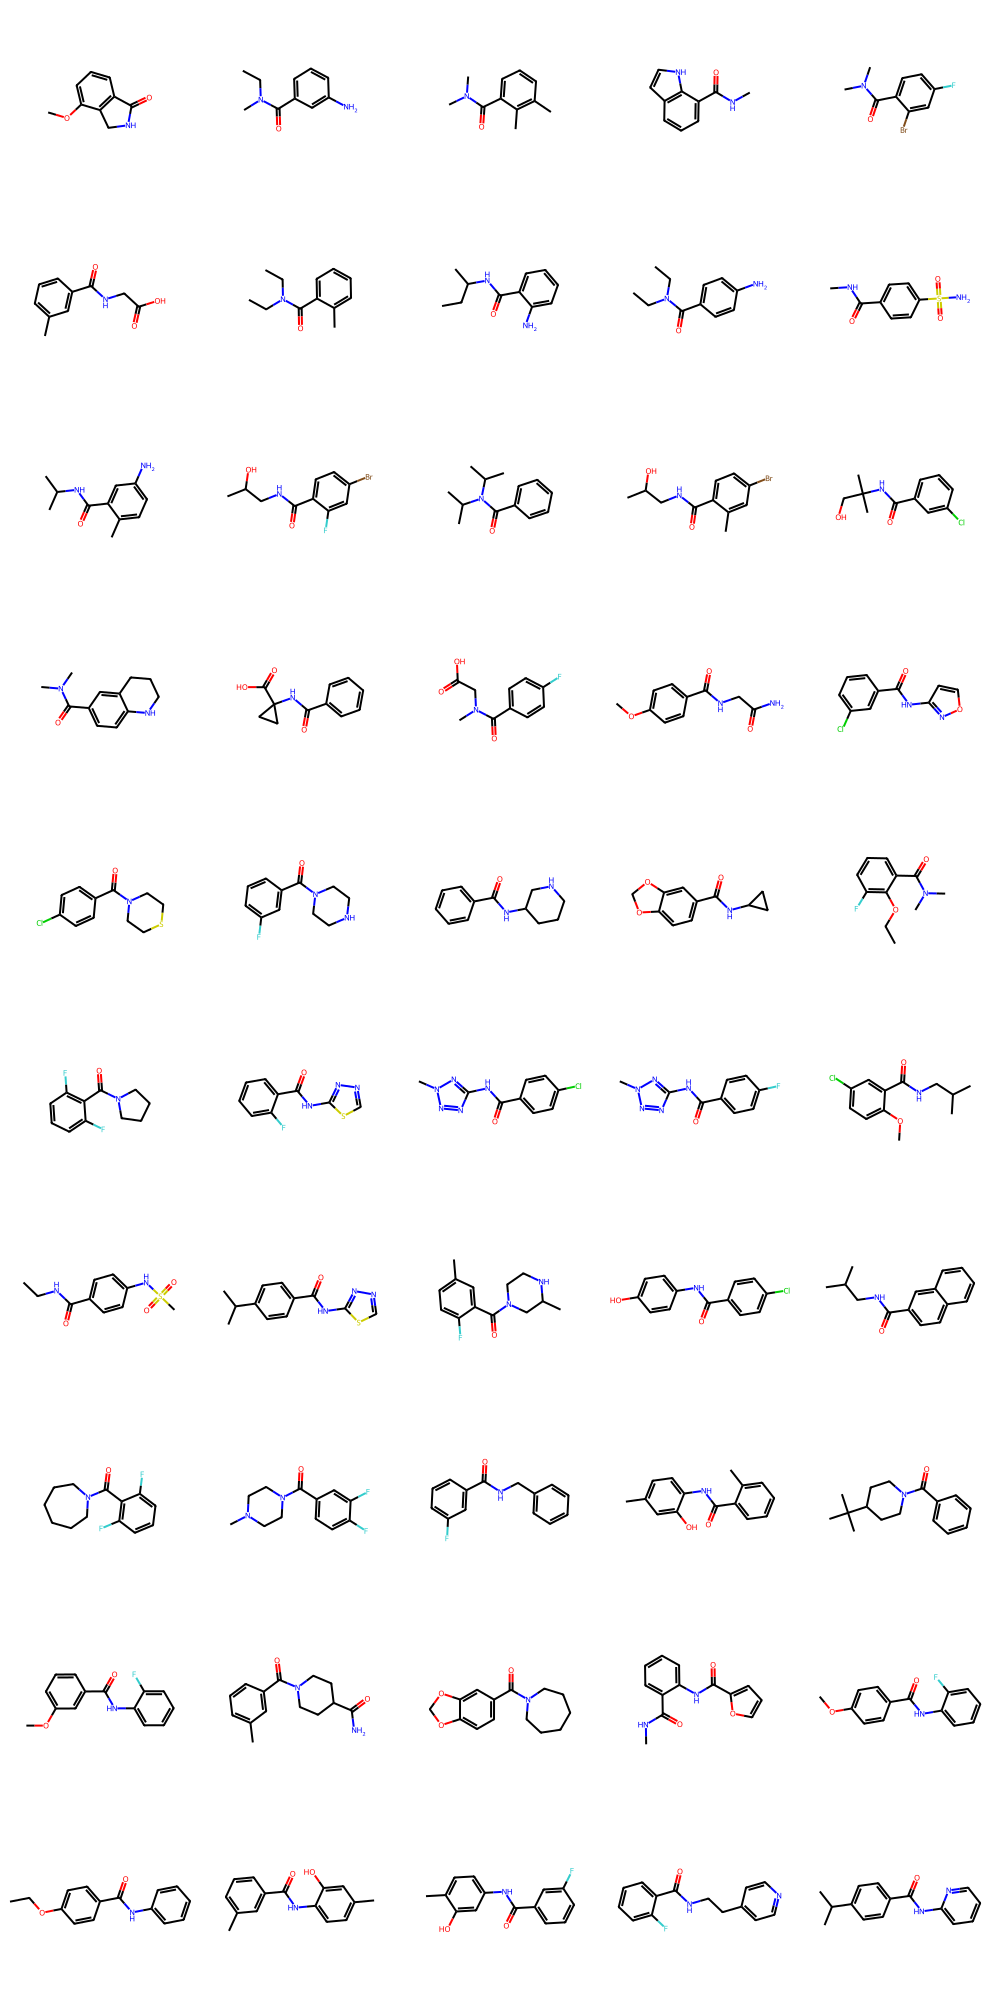

In [55]:
from rdkit.Chem import Draw
aminomeythylpyrazole = Chem.MolFromSmiles('c1ccccc1C(NC)=O')
l = libraries.loc[libraries.mol.apply(lambda mol: mol.HasSubstructMatch(aminomeythylpyrazole)) & (libraries.library == 'DSiPoised')]

Draw.MolsToGridImage(l.sort_values('N_heavy_atoms').mol, molsPerRow=5)

In [56]:
AllChem.CalcExactMolWt(hitdex['x1098_0B'])

269.0775966

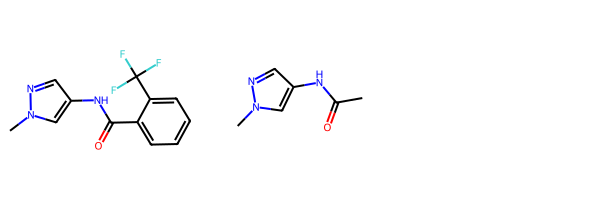

In [63]:
Draw.MolsToGridImage([Chem.MolFromSmiles('Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1'),
                      Chem.MolFromSmiles('Cn1cc(NC(=O)C)cn1')])